## Data Science and Business Analytics - GRIPJAN2021
## Submitted by: Bansi Babriya

## Task 2 : Prediction using Unsupervised Machine Learning
## GRIP @ The Sparks Foundation

In this task I tried to predict the optimum number of clusters
and represent it visually from the given ‘Iris’ dataset.

## Import required libraries
### Technical Stack : Scikit Learn, Numpy, Pandas, Matplotlib

In [80]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import sklearn.metrics as sm

## Load and reading the Iris Dataset

In [81]:
df=pd.read_csv('Iris.csv')
df.drop(['Id'],axis=1,inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [82]:
df.shape

(150, 5)

In [83]:

df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [84]:
df.drop_duplicates(inplace=True)

## Label Encoding

In [85]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
df['Species']=l.fit_transform(df['Species'])
df['Species'].value_counts()

1    50
2    49
0    48
Name: Species, dtype: int64

## PetalLengthCm vs PetalWidthCm

we'll compare our final plot with this graph to check how accurate our model is

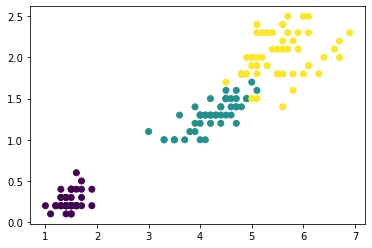

In [86]:
plt.scatter(df['PetalLengthCm'],df['PetalWidthCm'],c=df.Species.values)

## Finding the optimum number of clusters for k-means classification

In [87]:
df=df.iloc[:,[0,1,2,3]].values

Elbow Method using within-cluster-sum-of-squares (wcss)

In [88]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)
    
wcss


[663.8952380952379,
 151.77145833333344,
 77.91989035087717,
 56.642370650183146,
 45.836345238095234,
 38.656917134717126,
 34.296638929588916,
 29.788370882190115,
 27.969508801383807,
 25.858146367521382]

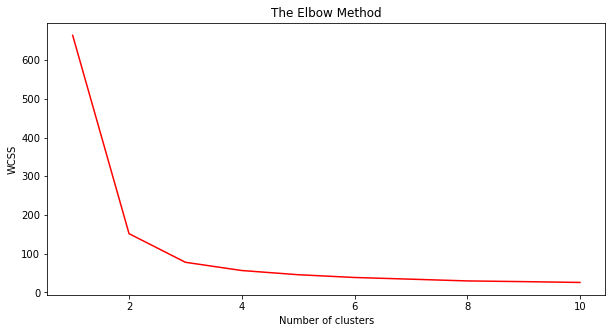

In [89]:
# Plotting the results onto a line graph, 
plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss,color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')# Within cluster sum of squares
plt.show()

we can clearly see why it is called 'The elbow method' from the above graph, 
the optimum clusters is where the elbow occurs.

The optimum value for K would be 3. 
As we can see that with an increase in the number of clusters the WCSS value decreases. 
We select the value for K on the basis of the rate of decrease in WCSS 
and we can see that after 3 the drop in wcss is minimal.

## Initialization using K-means++

In [90]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 5)
y_kmeans = kmeans.fit_predict(df)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0])

## Visualizing the Clusters

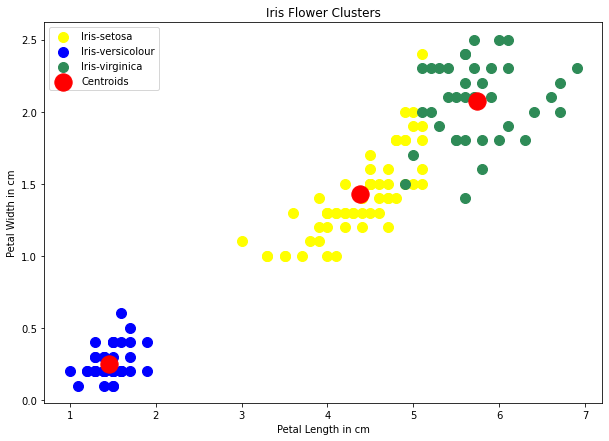

In [91]:
# Visualising the clusters - On the first two columns
fig = plt.figure(figsize=(10, 7))
plt.scatter(df[y_kmeans == 0, 2], df[y_kmeans == 0, 3], s = 100, c = 'yellow', label = 'Iris-setosa')
plt.scatter(df[y_kmeans == 1, 2], df[y_kmeans == 1, 3], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(df[y_kmeans == 2, 2], df[y_kmeans == 2, 3], s = 100, c = 'seagreen', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], s = 300, c = 'red',
            label = 'Centroids')

plt.legend()
plt.title('Iris Flower Clusters')
plt.ylabel('Petal Width in cm')
plt.xlabel('Petal Length in cm')
plt.legend()

### Conclusion - Here, We can see that our predicted graph is quite similar to the actual one.

## Thank you